# Aperture Photometry (photutils.aperture)

Documentation at the following link:

https://photutils.readthedocs.io/en/stable/aperture.html

In Photutils, the $\color{blue}{\text{aperture_photometry()}}$ function is the main tool to perform aperture photometry on an astronomical image. 

Photutils provides several apertures defined in pixel or sky coordinates. 

- $\color{blue}{\text{CircularAperture}}$ (more common)
- $\color{blue}{\text{CircularAnnulus}}$ (more common)
- $\color{blue}{\text{EllipticalAperture}}$
- $\color{blue}{\text{EllipticalAnnulus}}$
- $\color{blue}{\text{RectangualrAperture}}$
- $\color{blue}{\text{RectangularAnnulus}}$

- $\color{blue}{\text{SkyCircularAperture}}$
- $\color{blue}{\text{SkyCircularAnnulus}}$
- $\color{blue}{\text{SkyEllipticalAperture}}$
- $\color{blue}{\text{SkyEllipticalAnnulus}}$
- $\color{blue}{\text{SkyRectangularAperture}}$
- $\color{blue}{\text{SkyRecatngularAnnulus}}$

Custom apertures can also be created by the user.

Let's load an example an perform aperture photometry:

In [99]:
from astropy.stats import sigma_clipped_stats
from photutils import datasets

#load_star image load an optical image of stars 

hdu = datasets.load_star_image()
data = hdu.data[0:401, 0:401]    
mean, median, std = sigma_clipped_stats(data, sigma=3.0)    
print((mean, median, std)) 

(3668.09661145823, 3649.0, 204.41388592022312)


Find the stars in the image using daophind:

In [12]:
from photutils import DAOStarFinder
daofind = DAOStarFinder(fwhm=3.0, threshold=5.*std)    
sources = daofind(data - median)    
for col in sources.colnames:    
    sources[col].info.format = '%.8g'  # for consistent table output
print(sources)

 id xcentroid ycentroid sharpness  ... sky peak    flux       mag     
--- --------- --------- ---------- ... --- ---- --------- ------------
  1 144.24757 6.3797904 0.58156257 ...   0 6903 5.6976747   -1.8892441
  2 208.66907 6.8205805 0.48348966 ...   0 7896 6.7186388   -2.0682032
  3 216.92614 6.5775933 0.69359525 ...   0 2195 1.6662764  -0.55436758
  4 351.62519 8.5459013 0.48577834 ...   0 6977 5.8970385   -1.9265849
  5 377.51991 12.065501 0.52038488 ...   0 1260 1.1178252  -0.12093477
  6 294.27284 12.737191 0.68021892 ...   0 2059 1.4809613  -0.42635928
  7 85.217728 14.710347 0.62394134 ...   0 1458 1.2457081  -0.23854075
  8 137.94129 17.464718 0.54340548 ...   0 5451 4.6833069   -1.6763815
  9 130.32797 18.678087 0.62723987 ...   0 3432 2.8641222   -1.1424789
 10  143.1105 18.623553 0.52124876 ...   0 6722 5.7556336   -1.9002329
...       ...       ...        ... ... ...  ...       ...          ...
276 292.58712 389.31304  0.3548582 ...   0 9231   4.64095   -1.6665172
277  9

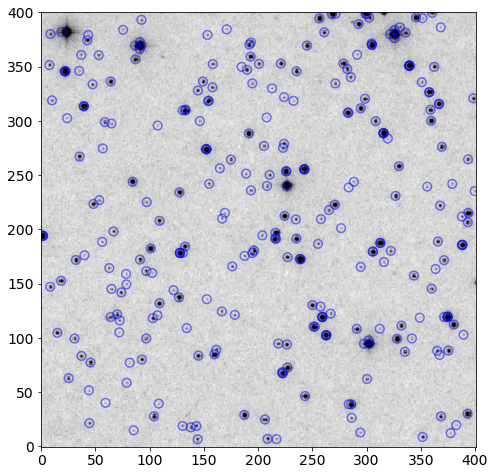

In [100]:
%matplotlib inline
from matplotlib import style, pyplot as plt
import numpy as np

from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils import CircularAperture

#plt.rcParams['image.cmap'] = 'viridis'
plt.rcParams['image.origin'] = 'lower'
plt.rcParams['axes.prop_cycle'] = style.library['seaborn-deep']['axes.prop_cycle']
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['axes.titlesize'] =  plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] =  plt.rcParams['ytick.labelsize'] = 14

positions = (sources['xcentroid'], sources['ycentroid'])
apertures = CircularAperture(positions, r=4.)
norm =ImageNormalize(stretch=SqrtStretch())
plt.imshow(data, cmap='Greys', norm=norm)
apertures.plot(color='blue', lw=1.5, alpha=0.5)

In [23]:
from photutils import CircularAperture
from photutils import aperture_photometry

positions = (sources['xcentroid'], sources['ycentroid'])
apertures = CircularAperture(positions, r=3.)

phot_table = aperture_photometry(data,apertures)
phot_table['xcenter'].info.format = '%7.4f'
phot_table['ycenter'].info.format = '%7.4f'
phot_table['aperture_sum'].info.format = '%7.4f'
print(phot_table)

 id xcenter  ycenter  aperture_sum
      pix      pix                
--- -------- -------- ------------
  1 144.2476   6.3798  150016.2858
  2 208.6691   6.8206  166979.5259
  3 216.9261   6.5776  115993.3355
  4 351.6252   8.5459  160148.6626
  5 377.5199  12.0655  112254.5382
  6 294.2728  12.7372  118501.6936
  7  85.2177  14.7103  110464.8072
  8 137.9413  17.4647  142749.2447
  9 130.3280  18.6781  123773.1879
 10 143.1105  18.6236  153969.0435
...      ...      ...          ...
277  92.3796 393.2493  129802.0079
278 256.4985 394.5632  254674.3613
279 302.4110 395.2757  192824.5808
280 351.4795 394.6797  120476.5422
281 345.5931 395.3822  246968.7964
282 267.9009 398.6199  283813.3917
283 271.4696 398.9124  196364.2636
284 299.0500 398.7847  269439.6246
285 299.9936 398.7666  270294.2274
286 360.4453 399.5238  156735.4915
Length = 286 rows


# Aperture and pixel overlap

The overlap of the apertures with the data pixels can be handled in different ways.

- `method='exact'`: the exact intersection of the aperture with each pixel is calculated
- `method='center'`: a pixel is considered to be entirely in or out of the aperture depending whether is center is in or out of the aperture
- `method='subpixel'`: pixels are divided into a number of subpixels, which are in or out of the aperture based on their centers. 

The options `'center'` and `'subpixels'` are faster but less precise

# Multiple Aperture at each position

In [27]:
radii = [3.0, 3.5, 4.0]

apertures = [CircularAperture(positions, r=r) for r in radii]

phot_table = aperture_photometry(data,apertures)
for col in phot_table.colnames:
    phot_table[col].info.format = '%7.4f'
print(phot_table)

   id    xcenter  ycenter  aperture_sum_0 aperture_sum_1 aperture_sum_2
           pix      pix                                                
-------- -------- -------- -------------- -------------- --------------
  1.0000 144.2476   6.3798    150016.2858    190260.6147    235904.6232
  2.0000 208.6691   6.8206    166979.5259    207447.3609    253455.3421
  3.0000 216.9261   6.5776    115993.3355    153882.4005    197430.2053
  4.0000 351.6252   8.5459    160148.6626    199283.9768    243781.4067
  5.0000 377.5199  12.0655    112254.5382    149346.6185    192523.4588
  6.0000 294.2728  12.7372    118501.6936    158071.1097    203007.9582
  7.0000  85.2177  14.7103    110464.8072    147274.2413    189986.1902
  8.0000 137.9413  17.4647    142749.2447    184656.2967    234123.1842
  9.0000 130.3280  18.6781    123773.1879    163082.5078    207852.6557
 10.0000 143.1105  18.6236    153969.0435    196293.8810    245056.6373
     ...      ...      ...            ...            ...        

# Background subtraction

$\color{blue}{\text{aperture_photometry()}}$ assumes that the data have been background subtracted (In the example above we use a median background --> daofind(data - median)). 

However, often the background is estimated locally around each sources using a nearby aperture or annulus aperture surrouding the object

# Local Background Subtraction

$\bf\text{Simple Mean within a circular annulus}$

In [55]:
from photutils import CircularAnnulus
apertures = CircularAperture(positions, r=3)
annulus_apertures = CircularAnnulus(positions, r_in=6., r_out=8.)

In [56]:
apers = [apertures, annulus_apertures]
phot_table = aperture_photometry(data, apers)
for col in phot_table.colnames:
    phot_table[col].info.format = '%7.4f'  # for consistent table output
print(phot_table)

   id    xcenter  ycenter  aperture_sum_0 aperture_sum_1
           pix      pix                                 
-------- -------- -------- -------------- --------------
  1.0000 144.2476   6.3798    150016.2858    299757.1687
  2.0000 208.6691   6.8206    166979.5259    316232.4994
  3.0000 216.9261   6.5776    115993.3355    325040.2241
  4.0000 351.6252   8.5459    160148.6626    323652.0152
  5.0000 377.5199  12.0655    112254.5382    322347.4301
  6.0000 294.2728  12.7372    118501.6936    323291.3791
  7.0000  85.2177  14.7103    110464.8072    319158.5943
  8.0000 137.9413  17.4647    142749.2447    355884.2521
  9.0000 130.3280  18.6781    123773.1879    349518.6671
 10.0000 143.1105  18.6236    153969.0435    335920.4618
     ...      ...      ...            ...            ...
277.0000  92.3796 393.2493    129802.0079    322127.4787
278.0000 256.4985 394.5632    254674.3613    292193.5687
279.0000 302.4110 395.2757    192824.5808    324623.2853
280.0000 351.4795 394.6797    1

The `aperture_sum_0` column refers to the first aperture in the list of input apertures (i.e. the circular aperture) and the `aperture_sum_1` column refers to the second aperture (i.e. the circular annulus). Note that we cannot simply subtract the aperture sums because the apertures have different areas.

To calculate the mean local background within the circular annulus aperture, we need to divide its sum by its area. The mean value can be calculated by using the $\color{blue}{\text{area()}}$ method:

In [57]:
bkg_mean = phot_table['aperture_sum_1'] / annulus_apertures.area()
print(bkg_mean)

aperture_sum_1
--------------
     3407.7025
     3594.9975
     3695.1256
     3679.3441
     3664.5133
     3675.2444
     3628.2620
     4045.7670
     3973.4017
     3818.8144
           ...
     4267.1058
     3662.0129
     3321.7179
     3690.3858
     4022.5974
     3098.5124
     2459.0370
     2549.8548
     2622.5194
     2554.5472
     2109.2247
Length = 286 rows


The total background within the circular aperture is then the mean local background times the circular aperture area:

In [58]:
bkg_sum = bkg_mean * apertures.area()
final_sum = phot_table['aperture_sum_0'] - bkg_sum
phot_table['residual_aperture_sum'] = final_sum
phot_table['residual_aperture_sum'].info.format = '%7.4f'  # for consistent table output
print(phot_table['residual_aperture_sum'])  

residual_aperture_sum
---------------------
           53665.7673
           65333.3654
           11516.1206
           56117.6577
            8642.8642
           14586.6075
            7878.1162
           28357.8779
           11427.9021
           45994.6094
                  ...
          135719.2857
           26261.0326
          160754.9999
           88481.3820
            6740.2789
          159360.4212
          214285.7592
          124268.8188
          195289.6350
          198066.1072
           97098.5683
Length = 286 rows


$\bf\text{Sigma-clipped median within a circular annulus}$

In [59]:
from photutils import CircularAnnulus
apertures = CircularAperture(positions, r=3)
annulus_apertures = CircularAnnulus(positions, r_in=6., r_out=8.)

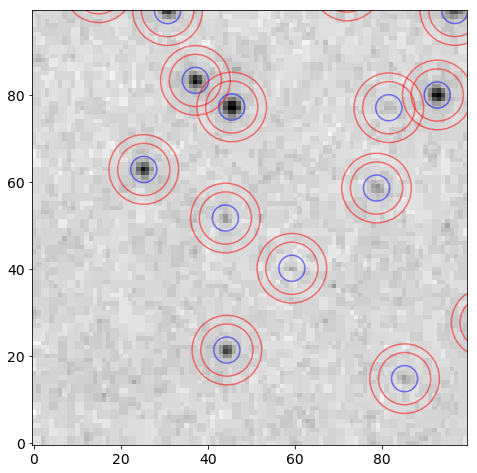

In [101]:
%matplotlib inline
from matplotlib import style, pyplot as plt
import numpy as np

from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils import CircularAperture

#plt.rcParams['image.cmap'] = 'viridis'
plt.rcParams['image.origin'] = 'lower'
plt.rcParams['axes.prop_cycle'] = style.library['seaborn-deep']['axes.prop_cycle']
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['axes.titlesize'] =  plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] =  plt.rcParams['ytick.labelsize'] = 14

positions = (sources['xcentroid'], sources['ycentroid'])
apertures = CircularAperture(positions, r=3.)
norm =ImageNormalize(stretch=SqrtStretch())
plt.imshow(data[0:100, 0:100], cmap='Greys', norm=norm)
apertures.plot(color='blue', lw=1.5, alpha=0.5)
annulus_apertures.plot(color='red', lw = 1.5, alpha = 0.5)

Aperture mask can be used to access the pixel values in any aperture:

In [70]:
annulus_masks = annulus_apertures.to_mask(method = 'center')

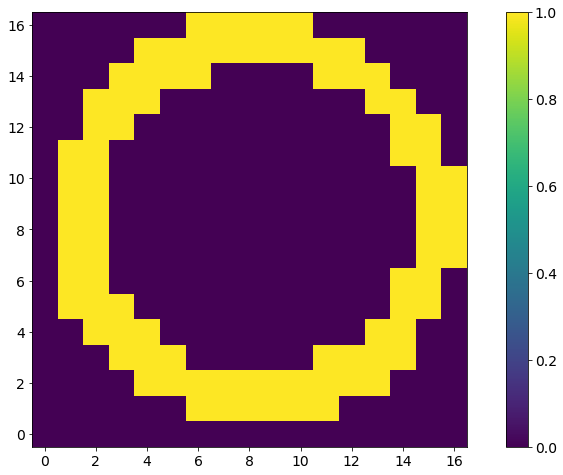

In [71]:
plt.imshow(annulus_masks[0])
plt.colorbar()

We can now use the $\color{blue}{\text{photutils.ApertureMask.multiply()}}$ method to get the values of the aperture mask multiplied to the data. Since the mask values are 0 or 1, the result is simply the data values within the annulus aperture:

In [72]:
annulus_data = annulus_masks[0].multiply(data)

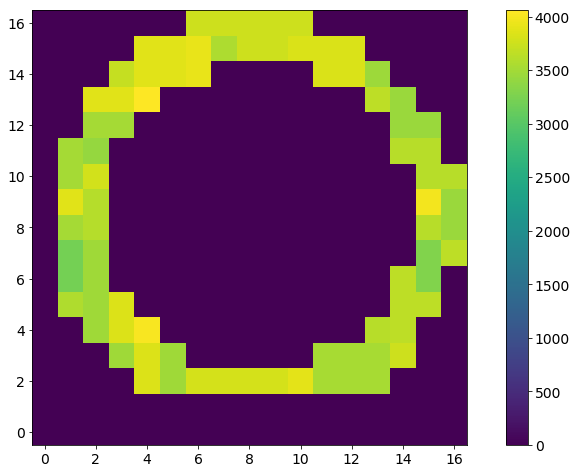

In [73]:
#plt.rcParams['image.cmap'] = 'viridis'
plt.imshow(annulus_data)
plt.colorbar()

From this 2D array, we can extract a 1D array of data values and use a statistical estimator on this 1D array to estimate the background level:

In [74]:
mask = annulus_masks[0].data
annulus_data_1d = annulus_data[mask > 0]
#annulus_data_1d.shape

from astropy.stats import sigma_clipped_stats
_, median_sigclip, _ = sigma_clipped_stats(annulus_data_1d)
print(median_sigclip)

3661.0


The total background within the circular aperture is then the local background level times the circular aperture area:

In [75]:
background = median_sigclip * apertures.area()
print(background)  

103512.3363431301


In [76]:
from astropy.stats import sigma_clipped_stats
from photutils import aperture_photometry
from photutils import CircularAperture, CircularAnnulus
from photutils.datasets import make_100gaussians_image

apertures = CircularAperture(positions, r=3)
annulus_apertures = CircularAnnulus(positions, r_in=6, r_out=8)
annulus_masks = annulus_apertures.to_mask(method='center')

bkg_median = []
for mask in annulus_masks:
    annulus_data = mask.multiply(data)
    annulus_data_1d = annulus_data[mask.data > 0]
    _, median_sigclip, _ = sigma_clipped_stats(annulus_data_1d)
    bkg_median.append(median_sigclip)
bkg_median = np.array(bkg_median)
phot = aperture_photometry(data, apertures)
phot['annulus_median'] = bkg_median
phot['aper_bkg'] = bkg_median * apertures.area()
phot['aper_sum_bkgsub'] = phot['aperture_sum'] - phot['aper_bkg']
for col in phot.colnames:
    phot[col].info.format = '%7.4f'  # for consistent table output
print(phot)

   id    xcenter  ycenter  ... annulus_median   aper_bkg  aper_sum_bkgsub
           pix      pix    ...                                           
-------- -------- -------- ... -------------- ----------- ---------------
  1.0000 144.2476   6.3798 ...      3661.0000 103512.3363      46503.9495
  2.0000 208.6691   6.8206 ...      3729.0000 105434.9910      61544.5349
  3.0000 216.9261   6.5776 ...      3598.0000 101731.0533      14262.2822
  4.0000 351.6252   8.5459 ...      3638.0000 102862.0267      57286.6360
  5.0000 377.5199  12.0655 ...      3638.0000 102862.0267       9392.5115
  6.0000 294.2728  12.7372 ...      3655.0000 103342.6903      15159.0033
  7.0000  85.2177  14.7103 ...      3564.0000 100769.7260       9695.0813
  8.0000 137.9413  17.4647 ...      3882.0000 109760.9641      32988.2805
  9.0000 130.3280  18.6781 ...      3791.0000 107187.9997      16585.1882
 10.0000 143.1105  18.6236 ...      3746.0000 105915.6547      48053.3888
     ...      ...      ... ...        

# Error Estimation

If and only if the `error` keyword is input to $\color{blue}{\text{aperture_photometry()}}$, the returned table will include a `aperture_sum_err` column in addition to `'aperture_sum'`. `'aperture_sum_err'` provides the propagated uncertainty associated with `'aperture_sum'`.

In [78]:
apertures = CircularAperture(positions, r=3)
error = np.sqrt(data)

phot_table = aperture_photometry(data, apertures, error=error)
for col in phot_table.colnames:
    phot_table[col].info.format = '%7.4f'  # for consistent table output
print(phot_table)

   id    xcenter  ycenter  aperture_sum aperture_sum_err
           pix      pix                                 
-------- -------- -------- ------------ ----------------
  1.0000 144.2476   6.3798  150016.2858         387.3194
  2.0000 208.6691   6.8206  166979.5259         408.6313
  3.0000 216.9261   6.5776  115993.3355         340.5779
  4.0000 351.6252   8.5459  160148.6626         400.1858
  5.0000 377.5199  12.0655  112254.5382         335.0441
  6.0000 294.2728  12.7372  118501.6936         344.2407
  7.0000  85.2177  14.7103  110464.8072         332.3625
  8.0000 137.9413  17.4647  142749.2447         377.8217
  9.0000 130.3280  18.6781  123773.1879         351.8141
 10.0000 143.1105  18.6236  153969.0435         392.3889
     ...      ...      ...          ...              ...
277.0000  92.3796 393.2493  129802.0079         360.2805
278.0000 256.4985 394.5632  254674.3613         504.6527
279.0000 302.4110 395.2757  192824.5808         439.1180
280.0000 351.4795 394.6797  120

# Pixel Masking

Pixels can be ignored/excluded (e.g., bad pixels) from the aperture photometry by providing an image mask via the `mask` keyword:

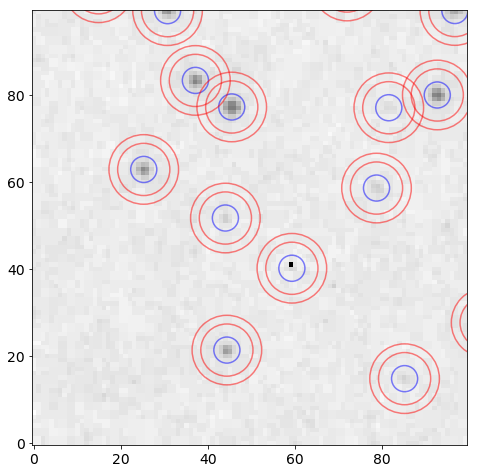

In [119]:
%matplotlib inline
from matplotlib import style, pyplot as plt
import numpy as np

from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils import CircularAperture

#plt.rcParams['image.cmap'] = 'viridis'
plt.rcParams['image.origin'] = 'lower'
plt.rcParams['axes.prop_cycle'] = style.library['seaborn-deep']['axes.prop_cycle']
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['axes.titlesize'] =  plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] =  plt.rcParams['ytick.labelsize'] = 14

hdu = datasets.load_star_image()
data = hdu.data[0:401, 0:401]

data[41,59] = 30000

positions = (sources['xcentroid'], sources['ycentroid'])
apertures = CircularAperture(positions, r=3.)
norm =ImageNormalize(stretch=SqrtStretch())
plt.imshow(data[0:100, 0:100], cmap='Greys', norm=norm)
apertures.plot(color='blue', lw=1.5, alpha=0.5)
annulus_apertures.plot(color='red', lw = 1.5, alpha = 0.5)

In [123]:
aperture = CircularAperture((60, 40), 3.)
mask = np.zeros_like(data, dtype=bool)
mask[40, 60] = True
t1 = aperture_photometry(data, aperture, mask=mask)
t1['aperture_sum'].info.format = '%.8g'  # for consistent table output
print(t1['aperture_sum'])

aperture_sum
------------
   126137.44


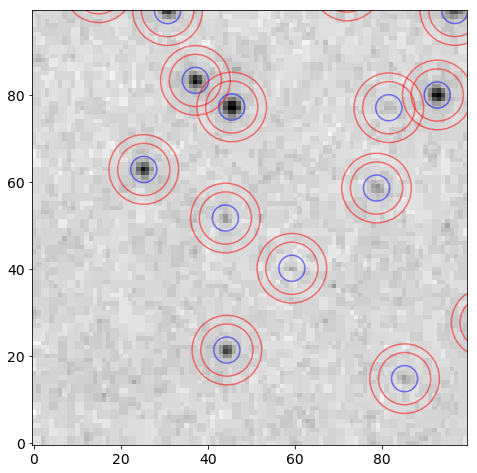

In [124]:
hdu = datasets.load_star_image()
data = hdu.data[0:401, 0:401]

#plt.rcParams['image.cmap'] = 'viridis'
plt.rcParams['image.origin'] = 'lower'
plt.rcParams['axes.prop_cycle'] = style.library['seaborn-deep']['axes.prop_cycle']
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['axes.titlesize'] =  plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] =  plt.rcParams['ytick.labelsize'] = 14

positions = (sources['xcentroid'], sources['ycentroid'])
apertures = CircularAperture(positions, r=3.)
norm =ImageNormalize(stretch=SqrtStretch())
plt.imshow(data[0:100, 0:100], cmap='Greys', norm=norm)
apertures.plot(color='blue', lw=1.5, alpha=0.5)
annulus_apertures.plot(color='red', lw = 1.5, alpha = 0.5)


In [125]:
aperture = CircularAperture((60,40),3.)
t2 = aperture_photometry(data,aperture)
t2['aperture_sum'].info.format = '%7.4f'  # for consistent table output
print(t2['aperture_sum'])


aperture_sum
------------
 104405.4352


# Aperture Photometry using Sky Coordinates

performing photometry using apertures defined in celestial coordinates simply requires defining a “sky” aperture at positions defined by a $\color{blue}{\text{SkyCoord}}$ object. Here we show an example of photometry on real data using a $\color{blue}{\text{SkyCircularAperture}}$.

$\bf\text{NOTE}$

- To perform aperture photometry with sky-based apertures, one will need to specify a WCS transformation.

- Sky apertures are not defined completely in celestial coordinates. They simply use celestial coordinates to define the central position, and the remaining parameters are converted to pixels using the pixel scale of the image at the central position. Projection distortions are not taken into account. If the apertures were defined completely in celestial coordinates, their shapes would not be preserved when converting to pixel coordinates.

We use a Spitzer 4.5 micron image of a region of the galactic plane:

In [126]:
from photutils import datasets
hdu = datasets.load_spitzer_image()   
catalog = datasets.load_spitzer_catalog()

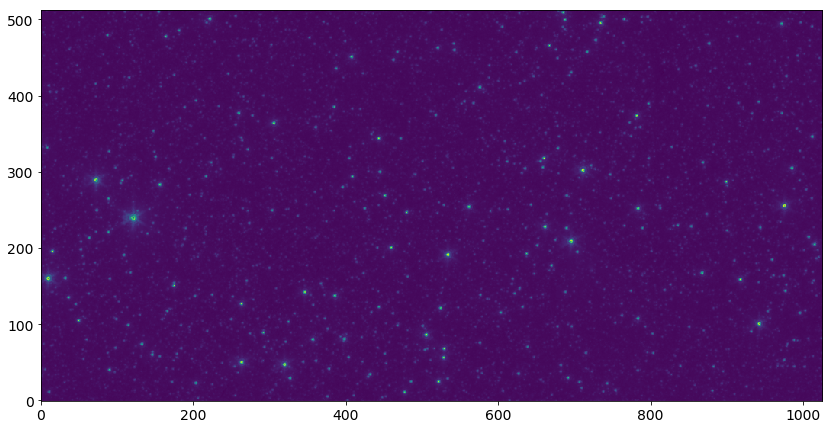

In [128]:
%matplotlib inline
from matplotlib import style, pyplot as plt
import numpy as np

from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize

#plt.rcParams['image.cmap'] = 'viridis'
plt.rcParams['image.origin'] = 'lower'
plt.rcParams['axes.prop_cycle'] = style.library['seaborn-deep']['axes.prop_cycle']
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['axes.titlesize'] =  plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] =  plt.rcParams['ytick.labelsize'] = 14


norm =ImageNormalize(stretch=SqrtStretch())
plt.imshow(hdu.data, norm=norm)

The catalog contains Galactic coordinates of the source in the image as well as the PSF fitted fluxes:

In [132]:
from astropy.coordinates import SkyCoord 
from astropy import units as u
from photutils import SkyCircularAperture

positions = SkyCoord(catalog['l'], catalog['b'], frame='galactic')   
apertures = SkyCircularAperture(positions, r=4.8 * u.arcsec)

Now perform the photometry in these apertures using the hdu. The hdu object is a FITS HDU that contains the data and a header describing the WCS transformation of the image. The WCS includes the coordinate frame of the image and the projection from celestial to pixel coordinates. The $\color{blue}{\text{aperture_photometry}}$ function uses the WCS information to automatically convert the apertures defined in celestial coordinates into pixel coordinates:

In [133]:
phot_table = aperture_photometry(hdu, apertures) 

We can then compare the fluxes:

In [134]:
import astropy.units as u
factor = (1.2 * u.arcsec) ** 2 / u.pixel
fluxes_catalog = catalog['f4_5']   
converted_aperture_sum = (phot_table['aperture_sum'] *
                          factor).to(u.mJy / u.pixel)   

And plot the comparison of the photometry:

Text(0, 0.5, 'Aperture photometry fluxes')

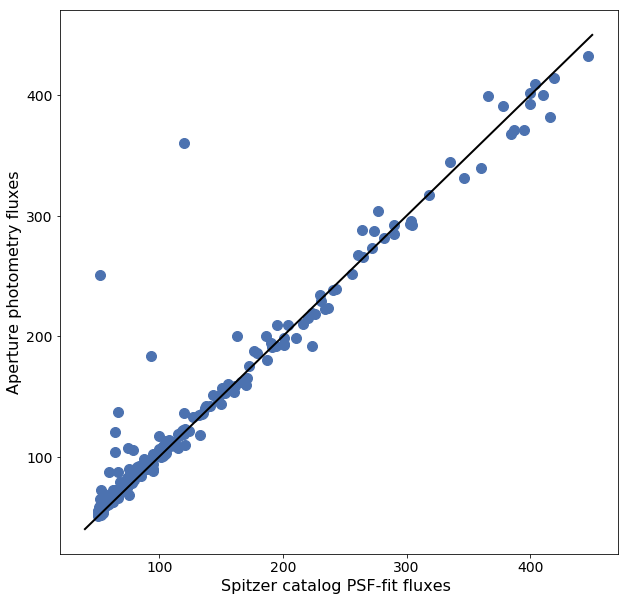

In [140]:
plt.rcParams['figure.figsize'] = (10, 10)

plt.scatter(fluxes_catalog, converted_aperture_sum.value, s = 100)
plt.plot([40, 100, 450],[40, 100, 450], color='black', lw=2)
plt.xlabel('Spitzer catalog PSF-fit fluxes ')
plt.ylabel('Aperture photometry fluxes')